**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [52]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%load_ext pycodestyle_magic

In [62]:
%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        super().__init__
        self.n_neighbors = n_neighbors
        
        
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.int32(y)
        self.classes = np.unique(np.int32(y))
        
        
    def predict(self, X):
        return self.predict_proba(X).argmax(axis = 1)
        
        
    def predict_proba(self, X):
        n_samples = X.shape[0]
        n_classes = self.classes.size
        y_p = np.zeros((n_samples,n_classes))
        X_train = self.X
        X_tast = np.array(X)
        
        for (i,vector) in enumerate(X_tast):
            vect_of_dist = ((X_train - vector)**2).sum(axis = 1)
            vect_of_dist = vect_of_dist**0.5         
            neibors = np.argsort(vect_of_dist)[0:self.n_neighbors]
            
            for j in neibors:
                y_p[i, self.y[j]] = y_p[i, self.y[j]] + 1.
            y_p[i] = y_p[i] / self.n_neighbors
            
        return y_p   
         
        
    def score(self, X, y):       
        return float((self.predict(X) == y).sum()) / y.shape[0]

**IRIS**

In [63]:
iris = datasets.load_iris()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [65]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [66]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [67]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [68]:
%time clf.predict(X_test)

Wall time: 3 ms


array([2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [69]:
%time my_clf.predict(X_test)

Wall time: 4 ms


array([2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [70]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

In [71]:
X_test.shape


(15, 4)

In [72]:
%time my_clf.predict_proba(X_test)

Wall time: 4 ms


array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

In [73]:
clf.score(X_test, y_test)

1.0

In [74]:
my_clf.score(X_test, y_test)

1.0

17


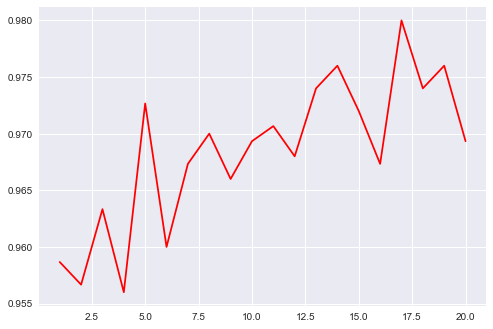

In [75]:
# Задание 3
num = 20
bunch = 100
ans = np.zeros(num)
m = np.zeros(bunch)
for j in range(1, num + 1):
    for i in range(0, bunch):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=j)
        my_clf.fit(X_train, y_train)
        m[i] = my_clf.score(X_test, y_test)
    ans[j-1] = m.mean()
print(ans.argmax()+1)
plt.plot(range(1, num + 1), ans, 'red')
plt.show()

**MNIST**

In [77]:
mnist = fetch_mldata('MNIST original')

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [22]:
%time clf.fit(X_train, y_train)

Wall time: 79 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [78]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [79]:
%time clf.predict(X_test)

Wall time: 0 ns


array([1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1])

In [80]:
%time my_clf.predict(X_test)

Wall time: 6.01 ms


array([1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1], dtype=int64)

In [81]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.5,  0.5],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ]])

In [82]:
%time my_clf.predict_proba(X_test)

Wall time: 6.5 ms


array([[ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.45,  0.55],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.1 ,  0.9 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.1 ,  0.9 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 ,  0.5 ],
       [ 0.  ,  0.2 ,  0.8 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  ]])

In [83]:
clf.score(X_test, y_test)

1.0

In [84]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 5

In [ ]:
# seaborn - разные варианты оформления графиков, библиотека базируется на matplotlib.
#
# matplotlib - модуль для визуализации данных
#
# train_test_split - функция для разделения данных на тренировочную и тестовую выборку
#
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - объединить несколько действий в одно
#
# StandardScaler (from sklearn.preprocessing import StandardScaler) - приводит данные к нормальному виду, т.е.
# к нулевому матожиданию и единичной дисперсии
#
# ClassifierMixin - базовый класс для классификаторов в sklearn
#
# NeighborsBase - базовый класс для KNN
#
# KNeighborsMixin - реализует поиск ближайших соседей
#
# SupervisedIntegerMixin - базовый класс, содежащий fit